### Survival rate- Decision Tree - Regular Classification

In [1]:
#import libs
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
#from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

# for visualisation
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image  
from subprocess import call

In [2]:
path = '/home/conmec/Python/Maria_sTraining/Hyperion_Training/T44/'

# read csv using pandas
df = pd.read_csv(path+"titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Find if there are missing values

In [5]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:11]

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
dtype: int64

In [6]:
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

8.099513655069211

Seems like 8.099% of the values are missing
##Filling in missing values automatically
Use Panda's fillna() function to fill in missing values in a dataframe.i.e fill NaN with 0.

In [7]:
# Create a temporary dataset
temp_df = df

# replace all NA's with 0
temp_df.fillna(0).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


Checking the surfvival by grouping by

In [8]:
df_survived = df.groupby(by = "Survived").count()
df_survived

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


In [9]:
positive = df.Survived[df['Survived'] == 1].count()
negative = df.Survived[df['Survived'] == 0].count()
print( 'Survived =' , positive,'not_survived = ', negative)

Survived = 342 not_survived =  549


In [10]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
# Encode the dependent variable manually
def f(x):
    if x == 'C':
        val = 0
    else:
        val = 1
    return val

df['EncodedEmbarked'] = df['Embarked'].apply(f)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,EncodedEmbarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


Train a decision tree and make a plot of it.

In [12]:
X = df.iloc[:,[2, 5, 6, 7, 9, 12]].values
y = df.iloc[:,1].values

X = X.reshape(-1, 6)
r=4
#split the train/test data
X_train, X_test, y_train, y_test = train_test_split(X,
                y, test_size=0.25, random_state=r)



Plot a line of your training accuracies and another of your development
accuracies in the same graph. Write down what shape the lines have and
what this shape means.

In [13]:
# training a model without pruning
unpruned = DecisionTreeClassifier(max_depth=None, random_state=r)
unpruned.fit(X_train, y_train)
print("Performance without pruning:", unpruned.score(X_test, y_test))
print("At depth:", unpruned.tree_.max_depth)

Performance without pruning: 0.7085201793721974
At depth: 26


# For tree pruning in Sklearn we usually use the maxdepth parameter, a
parameter which determines how many levels the tree can have. Try
building your model with different values of the max_depth [2-10]. At each
step, create a plot of your tree and store the accuracies on both the training
and development data

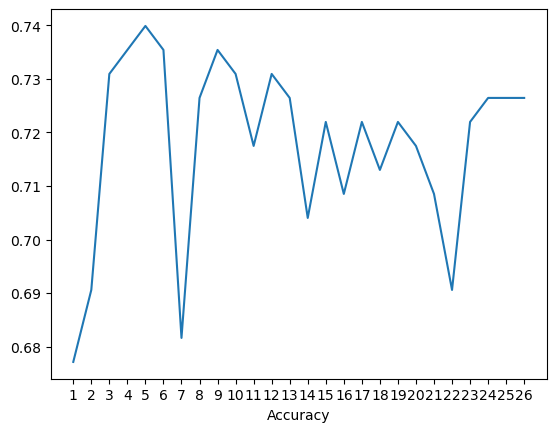

In [14]:
# looking at effect of pruning   
pruned_depths = range(1,unpruned.tree_.max_depth+1)

pruned_scores = [] 
for d in pruned_depths:
  clf = DecisionTreeClassifier(max_depth=d, random_state=r)
  clf.fit(X_train, y_train)
  score = clf.score(X_test, y_test)
  pruned_scores.append(score)

fig, ax = plt.subplots()
ax.plot(pruned_depths, pruned_scores)
plt.xlabel("Max_depth values")
plt.xlabel("Accuracy")
ax.xaxis.set_ticks(pruned_depths)
plt.show()

In [15]:
# fitting the chosen tree
best_depth = pruned_depths[np.argmax(pruned_scores)]
print('Best performance reached at depth of:', best_depth)

pruned = DecisionTreeClassifier(max_depth=best_depth)
pruned.fit(X, y)

Best performance reached at depth of: 5


DecisionTreeClassifier(max_depth=5)

## Visualisation

### Visualise tree
We can visualise our tree using Sklearn.

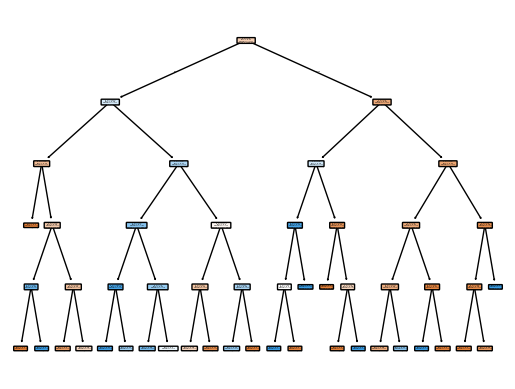

In [16]:
# Visualise the tree with maxdepth=10
fig = plt.figure()
tree.plot_tree(pruned,feature_names = df['Survived'], 
                   rounded = True, proportion = False, 
                   precision = 2, filled = True) #display tree
fig.savefig('pruned_tree.png')
  
#Image(filename = 'pruned_tree.png', width=400) #uncomment if using graphviz


Find the best max_depth

In [17]:
# training a model without pruning
unpruned = DecisionTreeClassifier(max_depth=None, random_state=r)
unpruned.fit(X_train, y_train)
print("Performance with pruning:", unpruned.score(X_test, y_test))
print("At depth:", unpruned.tree_.max_depth)

Performance with pruning: 0.7085201793721974
At depth: 26


#### Testing max_depth of 10 for the tree

In [18]:
# training a model without pruning
pruned = DecisionTreeClassifier(max_depth=10, random_state=r)
pruned.fit(X_train, y_train)
print("Performance with pruning:", pruned.score(X_test, y_test))
print("At depth:", pruned.tree_.max_depth)

Performance with pruning: 0.7309417040358744
At depth: 10


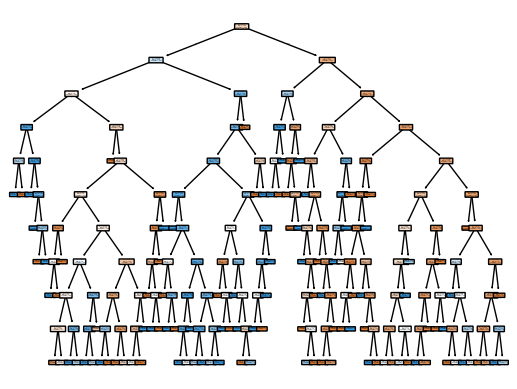

In [19]:
# Visualise the tree with maxdepth=10
fig = plt.figure()
tree.plot_tree(pruned,feature_names = df['Survived'], 
                   rounded = True, proportion = False, 
                   precision = 2, filled = True) #display tree
fig.savefig('pruned_tree.png')
  
#Image(filename = 'pruned_tree.png', width=400) #uncomment if using graphviz


Checking the accuracy

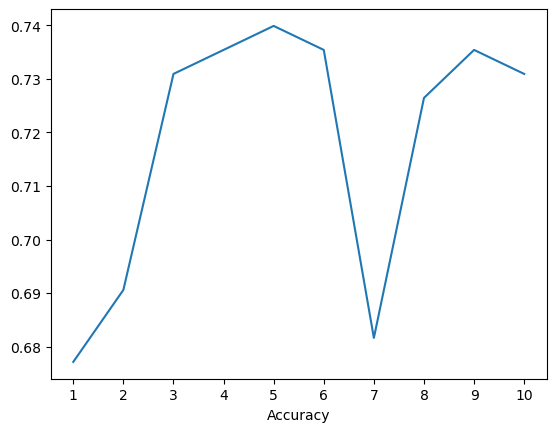

In [20]:
# looking at effect of pruning   
pruned_depths = range(1,pruned.tree_.max_depth+1)

pruned_scores = [] 
for d in pruned_depths:
  clf = DecisionTreeClassifier(max_depth=d, random_state=r)
  clf.fit(X_train, y_train)
  score = clf.score(X_test, y_test)
  pruned_scores.append(score)

fig, ax = plt.subplots()
ax.plot(pruned_depths, pruned_scores)
plt.xlabel("Max_depth values")
plt.xlabel("Accuracy")
ax.xaxis.set_ticks(pruned_depths)
plt.show()

# Testing max depths with 5

In [21]:
# training a model without pruning
pruned = DecisionTreeClassifier(max_depth=5, random_state=r)
pruned.fit(X_train, y_train)
print("Performance with pruning:", pruned.score(X_test, y_test))
print("At depth:", pruned.tree_.max_depth)

Performance with pruning: 0.7399103139013453
At depth: 5


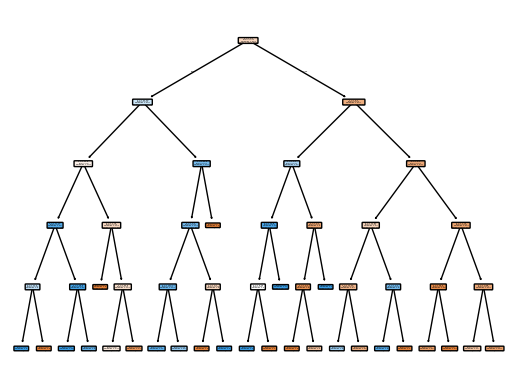

In [22]:
# Visualise the tree with maxdepth=10
fig = plt.figure()
tree.plot_tree(pruned,feature_names = df['Survived'], 
                   rounded = True, proportion = False, 
                   precision = 2, filled = True) #display tree
fig.savefig('pruned_tree.png')
  
#Image(filename = 'pruned_tree.png', width=400) #uncomment if using graphviz


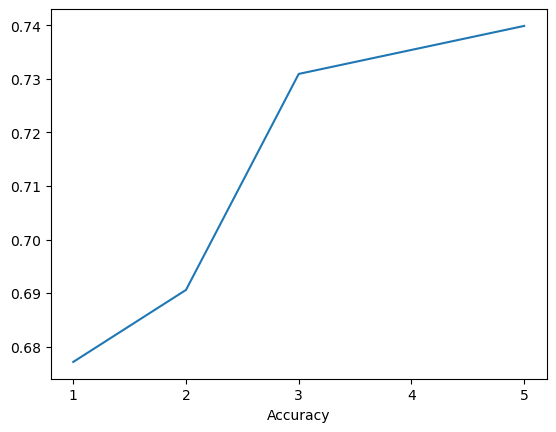

In [23]:
# looking at effect of pruning   
pruned_depths = range(1,pruned.tree_.max_depth+1)

pruned_scores = [] 
for d in pruned_depths:
  clf = DecisionTreeClassifier(max_depth=d, random_state=r)
  clf.fit(X_train, y_train)
  score = clf.score(X_test, y_test)
  pruned_scores.append(score)

fig, ax = plt.subplots()
ax.plot(pruned_depths, pruned_scores)
plt.xlabel("Max_depth values")
plt.xlabel("Accuracy")
ax.xaxis.set_ticks(pruned_depths)
plt.show()

Optimum max depth

In [24]:
# fitting the chosen tree
best_depth = pruned_depths[np.argmax(pruned_scores)]
print('Best performance reached at depth of:', best_depth)

pruned = DecisionTreeClassifier(max_depth=best_depth)
pruned.fit(X, y)

Best performance reached at depth of: 5


DecisionTreeClassifier(max_depth=5)

In [25]:
# training a model without pruning
pruned = DecisionTreeClassifier(max_depth=26, random_state=r)
pruned.fit(X_train, y_train)
print("Performance with pruning:", pruned.score(X_test, y_test))
print("At depth:", pruned.tree_.max_depth)

Performance with pruning: 0.726457399103139
At depth: 26


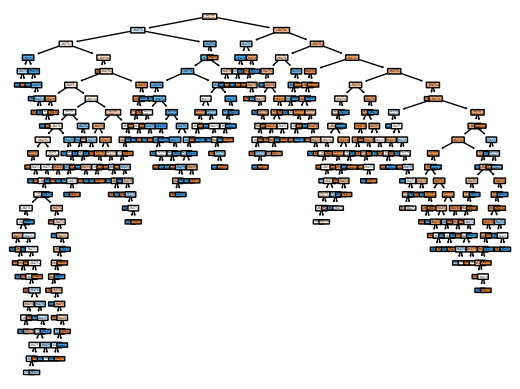

In [26]:
# Visualise the tree with maxdepth=10
fig = plt.figure()
tree.plot_tree(pruned,feature_names = df['Survived'], 
                   rounded = True, proportion = False, 
                   precision = 2, filled = True) #display tree
fig.savefig('pruned_tree.png')
  
#Image(filename = 'pruned_tree.png', width=400) #uncomment if using graphviz


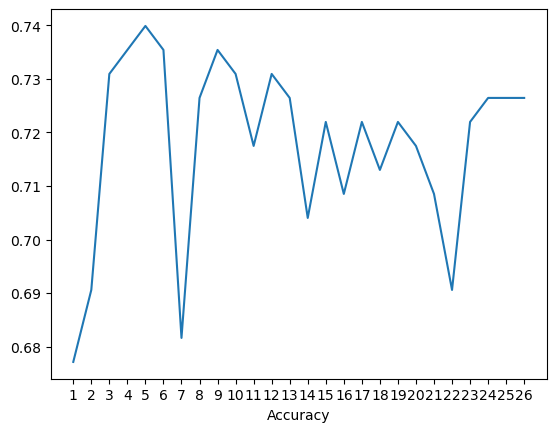

In [27]:
# looking at effect of pruning   
pruned_depths = range(1,pruned.tree_.max_depth+1)

pruned_scores = [] 
for d in pruned_depths:
  clf = DecisionTreeClassifier(max_depth=d, random_state=r)
  clf.fit(X_train, y_train)
  score = clf.score(X_test, y_test)
  pruned_scores.append(score)

fig, ax = plt.subplots()
ax.plot(pruned_depths, pruned_scores)
plt.xlabel("Max_depth values")
plt.xlabel("Accuracy")
ax.xaxis.set_ticks(pruned_depths)
plt.show()

### How to visualise the decison tree on a scatter plot.

By visualising our decision tree's prediction on a scatter plot we can see how the model gets more and more specific as the depth of the tree increases.

# isolate only 2 features (sepal width and length) to allow visualisation on a 2d scale


In [28]:
X_sep = df.iloc[:,[6,7]].values
#X = X.reshape(-1, 2)

ValueError: num must be 1 <= num <= 4, not 5

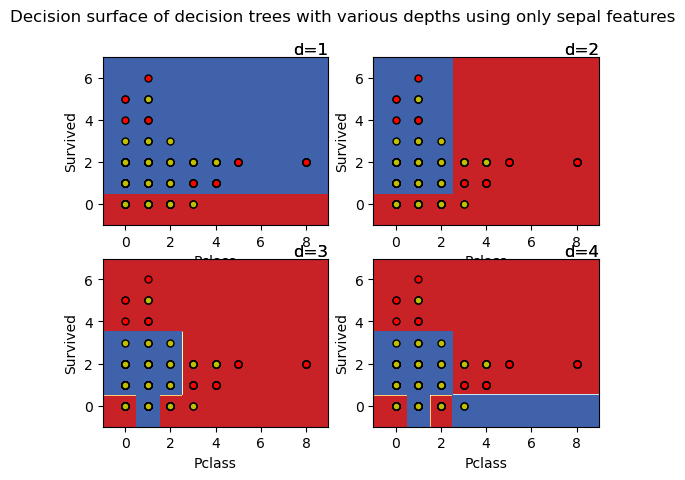

In [43]:
plt.suptitle("Decision surface of decision trees with various depths using only sepal features")

# make subplots for each depth
for idx, d in enumerate(pruned_depths):
  ax = plt.subplot(2, 2, idx+1)

  x_min, x_max = X_sep[:, 0].min() - 1, X_sep[:, 0].max() + 1
  y_min, y_max = X_sep[:, 1].min() - 1, X_sep[:, 1].max() + 1
  
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                       np.arange(y_min, y_max, 0.02))
  clf = DecisionTreeClassifier(max_depth=d).fit(X_sep, y)
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

  plt.xlabel(df.columns[2])
  plt.ylabel(df.columns[1])

  ax.title = plt.title('d={}'.format(d), loc='right', pad=-15)

  # Plot the training points
  for i, color in zip(range(3), "ryb"):
      idx = np.where(y == i)
      plt.scatter(X_sep[idx, 0], X_sep[idx, 1], c=color, label=df["Survived"],
                  cmap=plt.cm.RdYlBu, edgecolor='black', s=25)
  
plt.legend(loc='upper center', ncol=3, bbox_to_anchor=(0, -0.40))
plt.show()
